# Lab 6: Support Vector Machines

**Support Vector Machines** are primarily used for classification tasks. The core idea behind SVMs is to find a ***hyperplane*** that best separates data points belonging to different classes. The hyperplane is chosen such that the ***margin***—the distance between the hyperplane and the closest points from either class (known as support vectors)—is maximized. A larger margin typically leads to better generalization to unseen data.

For this exercise, we will go back to using our Iris dataset that we used during our first lab on classification.

## A Binary SVM Classifier

### Step 1: Import Required Libraries

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
```

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Import away!

### Step 2: Load the Iris Dataset
We'll load the Iris dataset and select two classes for binary classification.

```python
# load the iris dataset
iris = datasets.load_iris()
X = iris.data[0:100, XXX] # keep first two features (sepal length and width)
y = iris.target[0:100] # keep second and third classes (Versicolor and Virginica)

# check out the shape of our data
print("Data shape:", X.shape)
print("Labels shape:", y.shape)
```

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Create the data.

### Step 3: Split the Dataset into Training and Test Sets

We will split the dataset into a training set and a test set with a seed of 24 and test size of 20%.

Keep in mind that SVMs are sensitive to the scale of data, so we must standardize our continuous predictors. Here, we use the StandardScalar() from sklearn's preprocessing functions to compute z-scores.

```python
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = XXX

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Split and standardize!

### Step 4: Train an SVM Model
Now, we will fit an SVM model to our training dataset.

The parameter C in SVM controls the regularization strength. It determines how much the model tries to avoid misclassifying training examples versus keeping a wider margin between classes.

When C is small (for example, 0.001 or 0.01), the model applies stronger regularization. This means it allows some misclassifications in order to maintain a smoother, wider margin. The result can be better generalization but possibly underfitting if C is too small.

When C is large (for example, 10, 100, or 1000), the model applies weaker regularization. It focuses more on classifying every training example correctly, even if that leads to a smaller margin or overfitting.

In practice, values between 0.001 and 1000 usually cover most datasets.

Navigate to the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to see what the names of these parameters must be called.

```python
# create and train the SVM model
model = svm.SVC(XXX='linear', XXX=.001)
model.fit(X_train, y_train)
```

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Train your SVM model. Start with a C of .001. Later on, we will come back and change this regularization parameter to see how it impacts our decision boundary and margins.

### Step 5: Visualize the Decision Boundary, Support Vectors, and Margins
Since we are only predicting on two classes, we can use the following function to visualize the decision boundary, margins, and data points.

```python
def plot_svm_decision_boundary(X_train, y_train, model):
    
    # continue for the binary case
    if len(np.unique(y_train)) == 2:

      # Create a grid to plot the decision boundary
      x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5  # feature 1
      y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5  # feature 2
      xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                          np.linspace(y_min, y_max, 100))

      # Get decision function values for the grid
      Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)

      # Plot the data points
      plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100)

      # Plot decision boundary
      x_decision = np.linspace(x_min, x_max, 100)
      y_decision = -(model.intercept_ + model.coef_[0][0] * x_decision) / model.coef_[0][1]
      plt.plot(x_decision, y_decision, 'k-', label='Decision Boundary')

      # Plot margins
      margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
      y_margin_upper = y_decision + margin
      y_margin_lower = y_decision - margin
      plt.plot(x_decision, y_margin_upper, 'k--', label='Margin')
      plt.plot(x_decision, y_margin_lower, 'k--')

      # Add labels and legend
      plt.title('SVM Decision Boundary and Margins')
      plt.xlabel('Sepal Length')
      plt.ylabel('Sepal Width')
      plt.legend()
      plt.xlim(x_min, x_max)
      plt.ylim(y_min, y_max)
      plt.show()
    
    else:
      return "Sorry, this function is only set up for binary SVMs!"

# Visualize the decision boundary
plot_svm_decision_boundary(X_train, y_train, model)
```
##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Visualize the decision boundary. Does it line up with what we know about a large value of C?

### Step 6: Evaluate the Model
We can now evaluate the model's performance on the test set. First we have to make predictions on our unseen test data.

```python
# predict the response for test dataset
y_pred = XXX
```

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Once you have your `y_pred`, evaluate your model with the classification metrics we've discussed previously. If you need help, refer back to `04_Classifiers_Part_01.ipynb`.

### Step 7: Tune the Model

We know that C can have a huge impact on our decision boundary and margins.

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Copy the training code from above and re-train your model with a new value for C. Visualize the new decision boundary and margins. What do you notice? Try as many values of C as you like.

### Step 8: Try another kernel

We know that this Iris dataset is pretty simple, and we were able to make a usable classifier, but let's practice implementing some other kernel types.

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Copy the training code from above and re-train your model with a new `kernel`. Read through the documentation for SVC [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to see what your options are.

## Multi-Class Classification with SVM: OvR and OvO Strategies

In this section, we'll explore how to implement multi-class classification using Support Vector Machines (SVM) with two different strategies: One-vs-Rest (OvR; AKA One-vs-All) and One-vs-One (OvO). We'll use the Iris dataset, keeping all three classes of iris flowers.

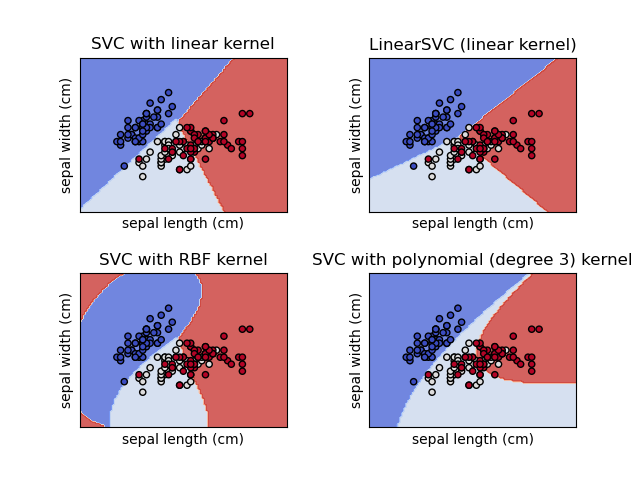

### Step 1: Load the data

```python
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We will use only the first two features for simplicity
y = iris.target
```
##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Load the full dataset this time.

### Step 2: Split and Standardize

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Just like before, split the data and standardize the predictors.

### Step 3: Train your Model

This is where we introduce the new addition to our `SVC()` model. We add a parameter called `decision_function_shape` and we can either set it to `ovo` or `ovr`.

```python
# Initialize the SVM model
model = svm.SVC(kernel='linear', C=1.0, decision_function_shape='XXX')
model.fit(X_train, y_train)
```

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Fit a model using each strategy. Be sure to name them something different so they both persist.

### Step 4: Make Predictions and Evaluate

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Evaluate each model using the key metrics we've discussed for classification tasks. Did one method work better than another? Why or why not?

### Step 5: Improve the Model(s)

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Change the C parameter of each model to try and improve its performance. Looking for a challenge? Try implementing [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). Or, try implementing a [different kind of kernel](https://scikit-learn.org/1.5/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py) like those in the image at the beginning of this section.